In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import prettytable as pt
from matplotlib import pyplot as plt
import os 
import warnings
warnings.filterwarnings("ignore")

###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################

directory = os.path.normpath(os.getcwd() + os.sep + os.pardir+ os.sep + os.pardir )
datadirectory=directory+"/data/yielddata/yielddata.csv"

yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 


In [2]:
# Fix parameters for building yield curve instruments
instrumentsconfig={
            "DEPO": {
                "businessDayConvention": "ModifiedFollowing",
                "dayCounter": "Actual360"
            },
            "SOFR": {
                "businessDayConvention": "ModifiedFollowing",
                "dayCounter": "Actual360",
                "method": "Compound"          },
            "IRS": {
                "businessDayConvention": "ModifiedFollowing",
                "dayCounter": "Thirty360",
                "frequency": "Semiannual"
            }
        } 

In [3]:
# Fix parameters for building yield curve
yieldcurveconfig={
        "settlementDays": 2,
        "intpMethod": "linear",
        "currency": "USD",
        "calendar": "UnitedStates",
        "dayCounter": "Thirty360",
        "period": "3M",
        "instruments":instrumentsconfig}

In [4]:
yieldcurve =  {
    "valuationDate": "2018-09-19",
    "yieldCurve":yieldcurveconfig ,
    "yieldData": yielddata.to_dict('r')
}
try:
    result = api.createTask(CalculationType.YIELD_CURVE, yieldcurve,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()

In [5]:
zerorates=result.get("zeroRates"),
discountrates=result.get("discountRates")
dates=[]
forwarddates= {}
rhoovayieldcurvedicts = {}
rhoovayieldcurvediscounts = {}
for rhvzr in zerorates[0]:
    rhoovayieldcurvedicts[datetime.strptime(rhvzr.get('date'),'%Y-%m-%d').date()] = rhvzr.get('rate')*100
    dates.append(rhvzr.get('date'))

for rhv in discountrates:
    rhoovayieldcurvediscounts[datetime.strptime(rhv.get('date'), '%Y-%m-%d').date()] = rhv.get('rate')
    

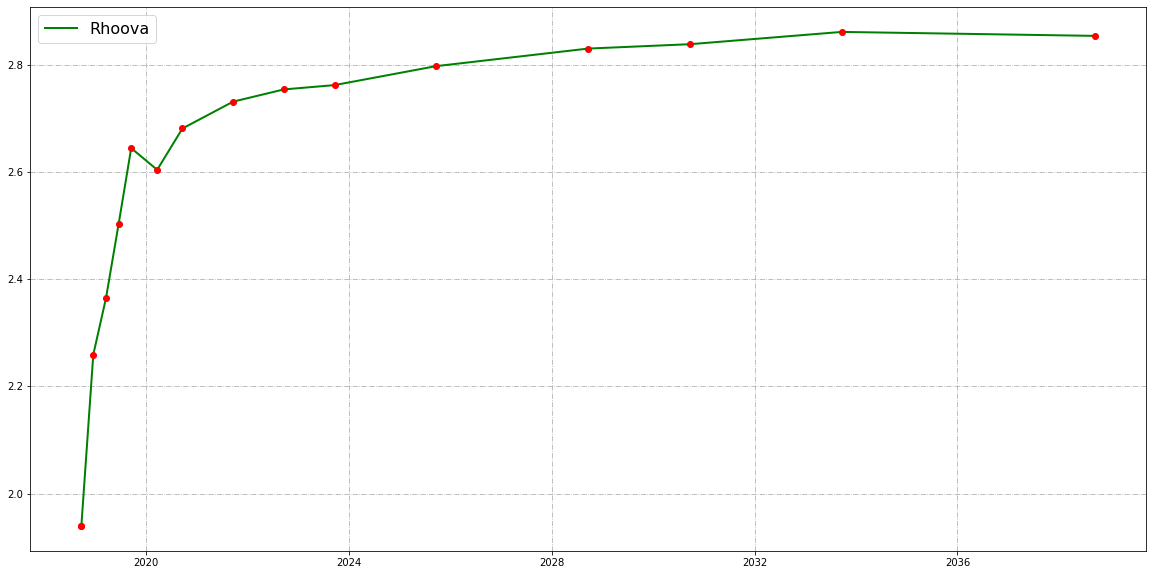

In [6]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvedicts.keys())
y1 = list(rhoovayieldcurvedicts.values())


ax.plot(x,y1, 'g', label='Rhoova', linewidth=2)
ax.plot(x,y1, 'ro', linewidth=4)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

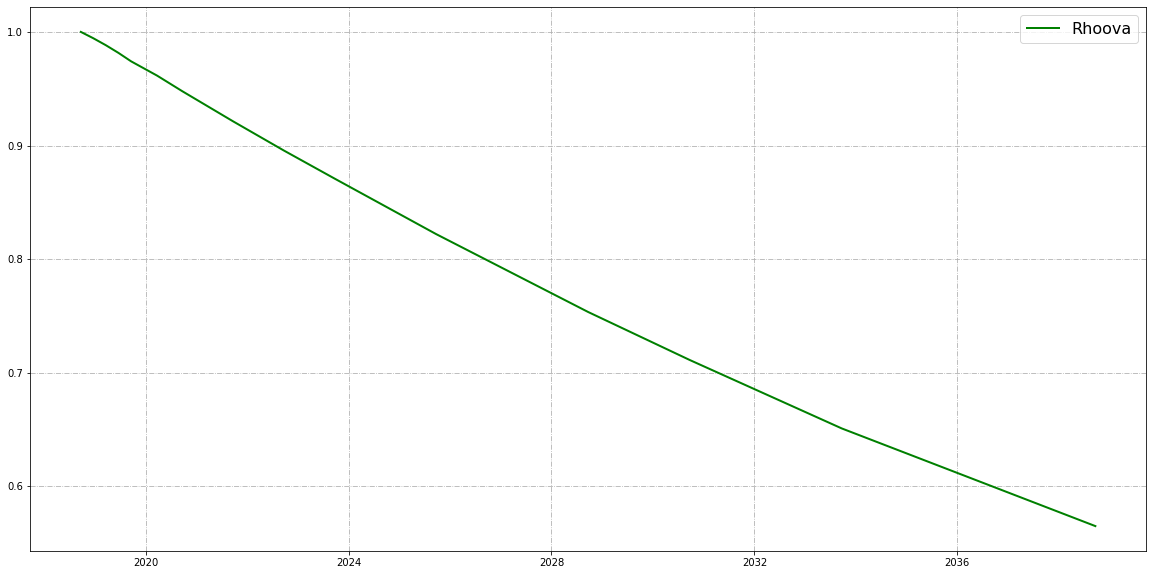

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayieldcurvediscounts.keys())
y1 = list(rhoovayieldcurvediscounts.values())

ax.plot(x,y1, 'g', label='Rhoova', linewidth=2)

leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

In [8]:
pTable = pt.PrettyTable(['Maturity','Rhoova ZeroRates','Rhoova Discount Rate'])
i=0
for key, val in rhoovayieldcurvedicts.items():
    pTable.add_row([key, val,rhoovayieldcurvediscounts.get(key)])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+------------------+----------------------+
|  Maturity  | Rhoova ZeroRates | Rhoova Discount Rate |
+------------+------------------+----------------------+
| 2018-09-21 |     1.939843     |          1           |
| 2018-09-24 |     1.939843     |       0.999838       |
| 2018-12-19 |     2.259442     |       0.994492       |
| 2019-03-20 |     2.364097     |       0.988314       |
| 2019-06-19 |     2.502125     |       0.981545       |
| 2019-09-18 |     2.644214     |       0.974119       |
| 2020-03-23 |     2.603816     |       0.961557       |
| 2020-09-21 |     2.680872     |       0.947795       |
| 2021-09-21 |     2.730863     |       0.921340       |
| 2022-09-21 |     2.753637     |       0.895704       |
| 2023-09-21 |     2.761681     |       0.871025       |
| 2025-09-22 |     2.797052     |       0.822118       |
| 2028-09-21 |     2.829776     |       0.753537       |
| 2030-09-23 |     2.837910     |       0.711267       |
| 2033-09-21 |     2.860818    